# Lesson 10: Multi-label

Python code to connect Colab to Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Python code to read data from Drive:

In [2]:
from PIL import Image

In [3]:
inputImg = Image.open("/content/drive/My Drive/Udemy: Image classification/Data/dog_and_baby.jpg").convert('RGB')

Add a code to show the image using pyplot library:

In [4]:
import matplotlib.pyplot as plt

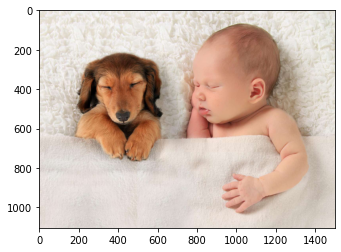

In [5]:
plt.imshow(inputImg)

Python code for the transformation with resize, centerCrop, toTensor, normalize

In [6]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

apply these transformation to the input image

In [7]:
inputImg_t = transform(inputImg)

In [8]:
print(inputImg_t.shape)

torch.Size([3, 224, 224])


now we will create the batch from this input image. we are adding one more dimension to it at dimesion 0 to convert it to a batch.

the batch that we get is the required size for ResNet and AlexNet to process ([1, 3, 224, 224]).

In [9]:
import torch
inputImg_bt = torch.unsqueeze(inputImg_t, 0)
print(inputImg_bt.shape)

torch.Size([1, 3, 224, 224])


Adding a pretrained model to Colab

In [10]:
from torchvision import models
#dir(models) to show all the models from torchvision

Adding resnet model

resnet.eval() is to set resnet to evaluation mode so we can do the prediction

In [ ]:
resnet = models.resnet152(pretrained=True)
resnet.eval()

Adding AlexNet model

In [ ]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

now use resnet to evaluate the image

In [12]:
output = resnet(inputImg_bt)

In [ ]:
output = alexnet(inputImg_bt)

resnet will not return the name of the class instead, it will return the key value id to the name of the class. So we will use this id together with the dictionary of 1000 classes that we have to fetch out the name of the class.

In [13]:
with open ('/content/drive/My Drive/Udemy: Image classification/imageClass/2.1 imagenet1000Classes.txt') as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

we used sigmoid instead of softmax because we want to give independent score to each class, use [:2] if only 2 classes is needed

In [16]:
_, predictedLabels = torch.sort(output, descending=True)
percentage = torch.sigmoid(output)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:3]]

[("207: 'golden retriever',", 99.99935913085938),
 ("434: 'bath towel',", 99.9954605102539),
 ("244: 'Tibetan mastiff',", 99.9950180053711)]